# Ionoshpere dataset


In [2]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from ucimlrepo import fetch_ucirepo

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

   Attribute1  Attribute3  Attribute4  Attribute5  Attribute6  Attribute7  \
0         1.0     0.99539    -0.05889     0.85243     0.02306     0.83398   
1         1.0     1.00000    -0.18829     0.93035    -0.36156    -0.10868   
2         1.0     1.00000    -0.03365     1.00000     0.00485     1.00000   
3         1.0     1.00000    -0.45161     1.00000     1.00000     0.71216   
4         1.0     1.00000    -0.02401     0.94140     0.06531     0.92106   

   Attribute8  Attribute9  Attribute10  Attribute11  ...  Attribute25  \
0    -0.37708     1.00000      0.03760      0.85243  ...      0.56811   
1    -0.93597     1.00000     -0.04549      0.50874  ...     -0.20332   
2    -0.12062     0.88965      0.01198      0.73082  ...      0.57528   
3    -1.00000     0.00000      0.00000      0.00000  ...      1.00000   
4    -0.23255     0.77152     -0.16399      0.52798  ...      0.03286   

   Attribute26  Attribute27  Attribute28  Attribute29  Attribute30  \
0     -0.51171      0.41078 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


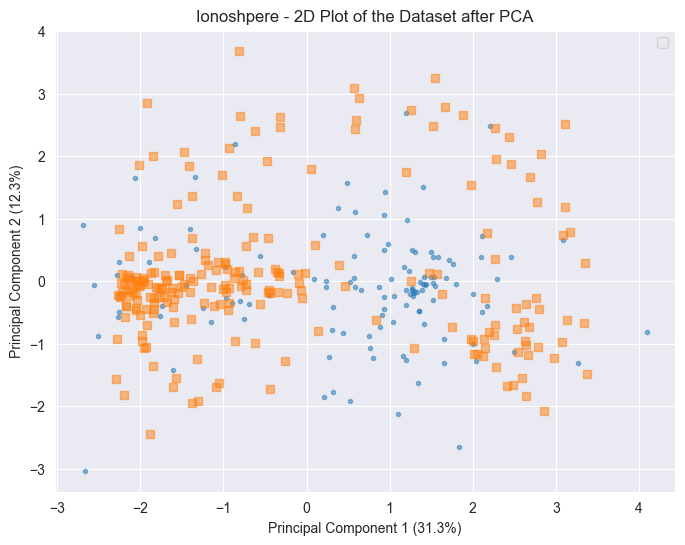

In [38]:

# fetch dataset
df = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = df.data.features
X = X.fillna(0)
X = X.astype(float)
X = X.loc[:, (X != 0).any(axis=0)]
y = df.data.targets
c = 2

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
plotting(X, y, ds_name="Ionoshpere", matrix_plot=False)

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [21]:
# %%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

[1, 273.51934166533823]
[2, 272.38850712234154]
[3, 272.36897870937054]
[4, 272.37576014834076]
[5, 272.37970727345385]
[6, 272.3813555583768]
[7, 272.3819920614213]
[1, 273.49970263824514]
[2, 272.3839795815025]
[3, 272.36690062534257]
[4, 272.3748991005317]
[5, 272.3793671440553]
[6, 272.3812222933113]
[7, 272.3819397048932]
[1, 273.49970263824514]
[2, 272.3839795815025]
[3, 272.3669006253426]
[4, 272.3748991005317]
[5, 272.3793671440553]
[6, 272.3812222933113]
[7, 272.3819397048932]
[1, 273.51934166533823]
[2, 272.38850712234154]
[3, 272.36897870937054]
[4, 272.37576014834076]
[5, 272.37970727345385]
[6, 272.3813555583768]
[7, 272.3819920614213]
[1, 273.49970263824514]
[2, 272.3839795815025]
[3, 272.3669006253426]
[4, 272.3748991005317]
[5, 272.3793671440553]
[6, 272.3812222933113]
[7, 272.3819397048932]
[1, 273.51934166533823]
[2, 272.38850712234154]
[3, 272.36897870937054]
[4, 272.37576014834076]
[5, 272.37970727345385]
[6, 272.3813555583768]
[7, 272.3819920614213]
[1, 273.4997026

J values: [272.3819397048932, 272.3819397048932, 272.3819397048932, 272.3819920614213, 272.3819920614213, 272.3819920614213, 272.3819920614213, 272.38199206142133, 272.38199206142133, 272.38199206142133]
ARI values: [0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166, 0.1728445165945166]
NS values: [0.9964175328971712, 0.8363807475677385, 0.9964175328971712, 0.9964178059129032, 0.9964178059129032, 0.9964178059129032, 0.9964178059129032, 0.836377969771849, 0.836377969771849, 0.836377969771849]
NMI values: [0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473, 0.13198407345907473]


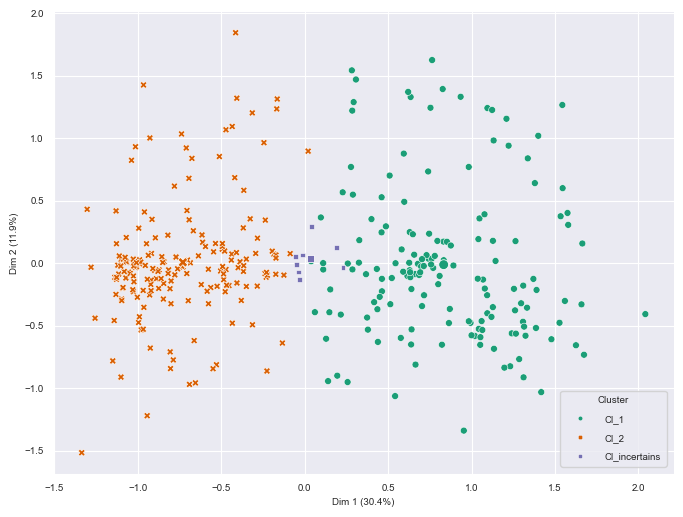

In [6]:
display_results_evidential(X, ecm_models, numeric_labels, up_low_appr=False)

## Weighted ECM (WECM)

In [41]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, epsilon=1e-6)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.2849321118286918, 0.28493211182869216, 0.28493211182869216, 0.28493211182869216, 0.28493211182869216, 0.28493237339453653, 0.28493237339453653, 0.2849323733945367, 0.2849323733945367, 0.2849323733945367]
ARI values: [0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524, 0.16327829420460524]
NS values: [0.879003928791762, 1.031963530179961, 1.031963530179961, 1.031963530179961, 1.031963530179961, 0.879012493525626, 0.879012493525626, 1.0319290674832395, 1.0319290674832395, 1.0319290674832395]
NMI values: [0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625, 0.12221690773627625]


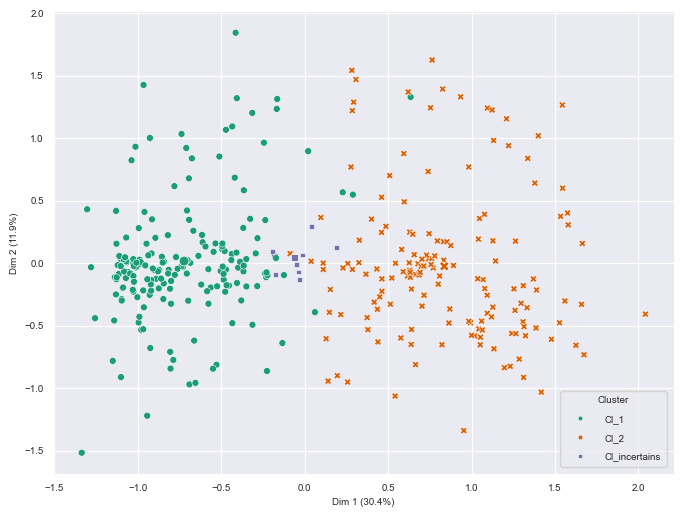

In [42]:
display_results_evidential(X, wecm_models, numeric_labels, up_low_appr=False)

# Weighted FCM - Keller et al. 2000

In [45]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.356153669104278, 0.35615370210461905, 0.356153724328127, 0.3561537966516922, 0.35615383163048414, 0.35615386955382267, 0.35615397665606274, 0.3561539851162842, 0.35615405117844345, 0.3561540656495206]
ARI values: [0.1585855396689369, 0.1585855396689369, 0.1585855396689369, 0.15395294754463168, 0.15395294754463168, 0.1585855396689369, 0.15395294754463168, 0.15395294754463168, 0.1585855396689369, 0.1585855396689369]
NMI values: [0.11751290981830452, 0.11751290981830452, 0.11751290981830452, 0.11292441674501774, 0.11292441674501774, 0.11751290981830452, 0.11292441674501774, 0.11292441674501774, 0.11751290981830452, 0.11751290981830452]


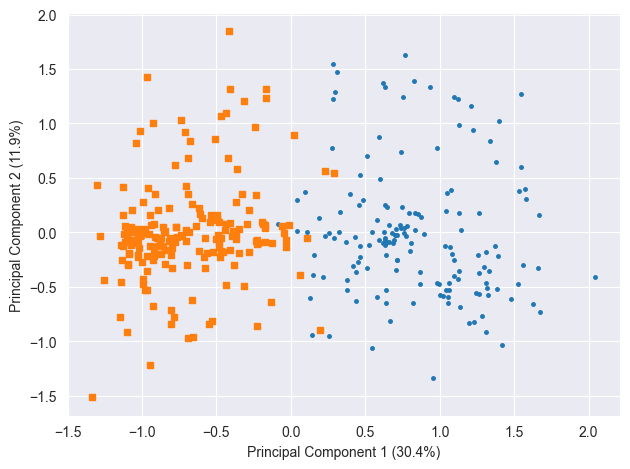

In [46]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [47]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=0.54, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [0.3769151154223022, 0.3769161482699851]
ARI values: [0.17272431159329507, 0.17272431159329507]
NMI values: [0.12986611168695084, 0.12986611168695084]


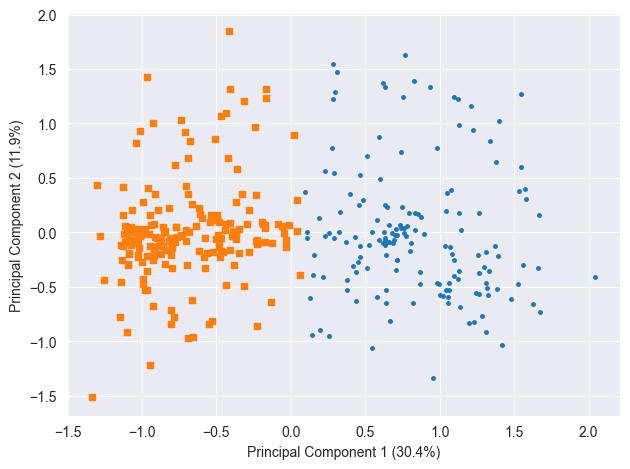

In [48]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [49]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [36.051106041301274, 36.051106041301274, 36.051106041301274, 36.051106041301274, 36.051106041301274, 36.05112264453287, 36.05112264453287, 36.05112264453287, 36.05112264453287, 36.05112264453287]
ARI values: [0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507, 0.17272431159329507]
NMI values: [0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084, 0.12986611168695084]


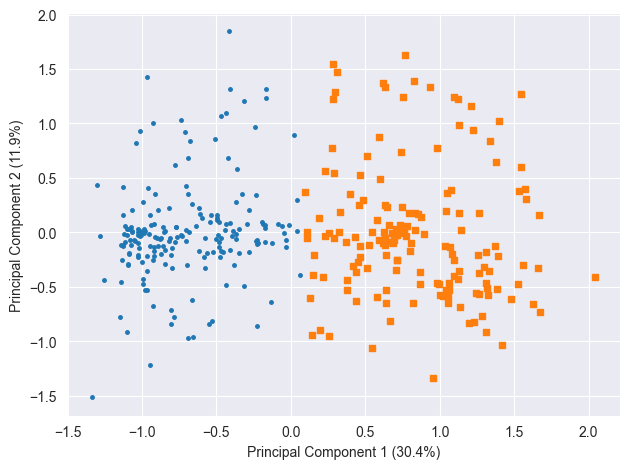

In [50]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [51]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.3564282432655736, 0.3564282432655736, 0.3564293959926895, 0.35643131661592975, 0.35643131661592975, 0.35643131661592975, 0.35643131661592975, 0.35643131661592975, 0.35643131661592975, 0.35643131661592975]
ARI values: [0.17760685473768603, 0.17760685473768603, 0.17760685473768603, 0.17760685473768603, 0.17760685473768603, 0.17760685473768603, 0.17760685473768603, 0.17760685473768603, 0.17760685473768603, 0.17760685473768603]
NMI values: [0.13485692093441007, 0.13485692093441007, 0.13485692093441007, 0.13485692093441007, 0.13485692093441007, 0.13485692093441007, 0.13485692093441007, 0.13485692093441007, 0.13485692093441007, 0.13485692093441007]


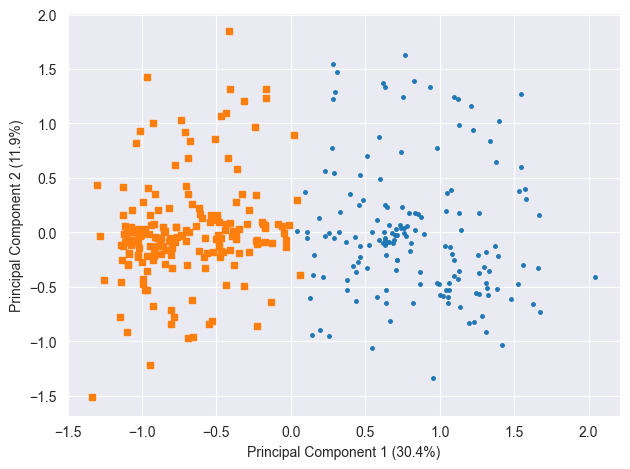

In [52]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [54]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.3607322713838027, 0.3607322713838027, 0.3607322713838027, 0.36073244313549935, 0.36073244313549935, 0.36073244313549935, 0.36073244313549935, 0.36073244313549935, 0.36073244313549935, 0.36073244313549935]
ARI values: [0.158716239915819, 0.158716239915819, 0.158716239915819, 0.158716239915819, 0.158716239915819, 0.158716239915819, 0.158716239915819, 0.158716239915819, 0.158716239915819, 0.158716239915819]
NMI values: [0.11948181506016402, 0.11948181506016402, 0.11948181506016402, 0.11948181506016402, 0.11948181506016402, 0.11948181506016402, 0.11948181506016402, 0.11948181506016402, 0.11948181506016402, 0.11948181506016402]


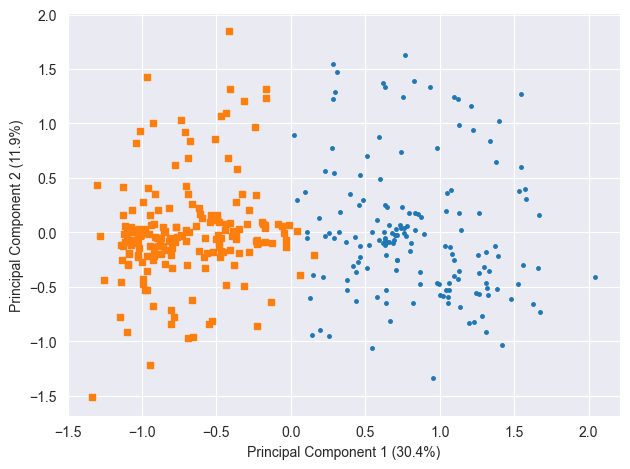

In [55]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [56]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [4.143897810935428, 4.143897810935428, 4.143897810935428, 4.143897810935428, 4.143897810935428, 4.143897810935428, 4.143897810935428, 4.143897810935428, 4.143897812076236, 4.143897812076236]
ARI values: [0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505, 0.16339987173320505]
NMI values: [0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263, 0.12425801135791263]


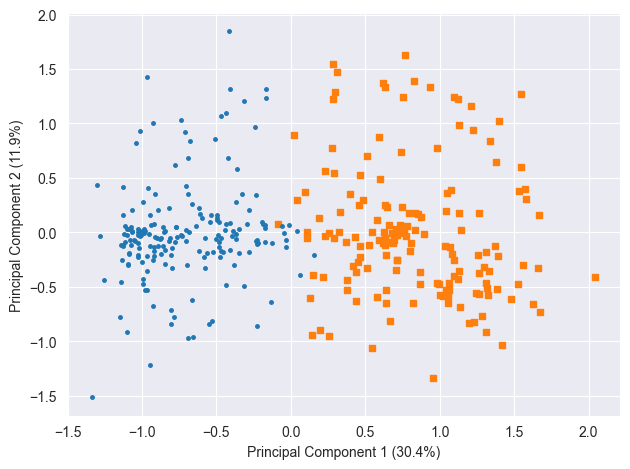

In [57]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)